# NTSB Exploration & Visualization
***

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/ntsb/cleaned/master.csv')
df = df.loc[(df['ev_country']=='USA') & (df['ev_type']=='ACC')] # Limit to US accidents 
df.drop(columns=['ev_country', 'ev_type'], inplace=True)

data = df.loc[~df['inj_tot_t'].isna()]
## clean more : impute ground injury values
data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']]= data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].fillna(0) 
data['ground_injury_total'] = data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].sum(axis=1)

/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_41176/2463442858.py:8: DtypeWarning: Columns (0,30,31,32,33,34,35,36,37,40,41,42,43,46,47,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ntsb/cleaned/master.csv')
/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_41176/2463442858.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']]= data[['inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd']].fillna(0)
/var/folders/c8/jr_n0v1x3n52_hpzs9nlqykw0000gn/T/ipykernel_41176/2463442858.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

***
# Checking Correlations (Continuous & Categorical)

## Cramers'V for Categorical Variables

In [27]:
def cramers_v(x, y):
    """Calculates Cramer's V for categorical Variables.
    x: first categorical variable
    y: second categorical variable

    Returns Cramer's V stat of correlation among categorical variables
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = np.sum(confusion_matrix.values)
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

## Spearman's Rank Correlation

In [5]:
test = data[['latitude','ev_highest_injury']].dropna()
spearmanr(test['latitude'],test['ev_highest_injury'])[1] # Extracts coef.

np.float64(0.05528130758323294)

*** 
# Visualization

<Axes: >

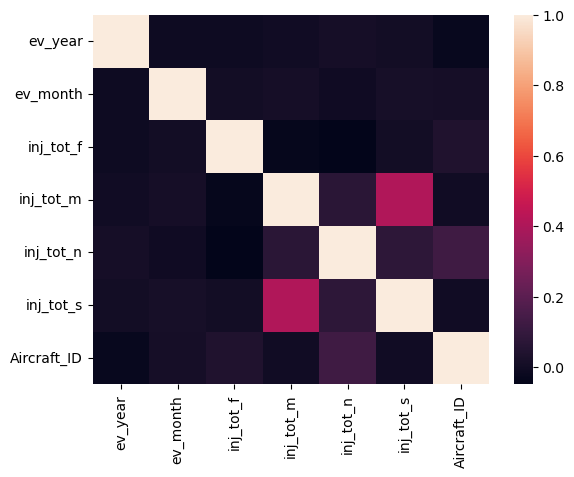

In [3]:
sns.heatmap(data.select_dtypes('int').corr())